## Importing Package

In [1]:
# %pip install missingno
# !pip install psycopg2-binary

In [2]:
%matplotlib notebook

import pandas as pd
import numpy as nyp
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.datasets import get_data
import pandas as pd
import missingno as msno
import math
from pycaret.regression import *
import psycopg2
import numpy as np
import dagshub
import mlflow
import warnings

warnings.filterwarnings('ignore')

In [3]:
sns.set_style("whitegrid")
custom_palette = ["#4C72B0", "#55A868", "#C44E52", "#8172B2", "#CCB974", "#64B5CD"]
sns.set_palette(custom_palette)

## Exploratory Data Analysis

In [4]:
df = pd.read_csv('../../data/raw/01_Melbourne_Residential.csv')
df.head()

Suburb           Address  Rooms Type    Price Method         Seller  \
0  Airport West     154 Halsey Rd      3    t   840000     PI         Nelson   
1   Albert Park    105 Kerferd Rd      2    h  1275000      S  hockingstuart   
2   Albert Park  85 Richardson St      2    h  1455000      S        Thomson   
3    Alphington        6 Smith St      4    h  2000000      S          Brace   
4    Alphington   5/6 Yarralea St      3    h  1110000      S         Jellis   

       Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/9/2023      13.5      3042  ...         2  1.0       303         225.0   
1  3/9/2023       3.3      3206  ...         1  0.0       120          82.0   
2  3/9/2023       3.3      3206  ...         1  0.0       159           NaN   
3  3/9/2023       6.4      3078  ...         2  4.0       853         263.0   
4  3/9/2023       6.4      3078  ...         2  2.0       208           NaN   

   YearBuilt    CouncilArea Lattitude  Longtitude                 Region  \
0     2016.0  Moonee Valley  -37.7180    144.8780   Western Metropolitan   
1     1900.0   Port Phillip  -37.8459    144.9555  Southern Metropolitan   
2        NaN   Port Phillip  -37.8450    144.9538  Southern Metropolitan   
3     1930.0        Darebin  -37.7707    145.0318  Northern Metropolitan   
4     2013.0          Yarra  -37.7854    145.0325  Northern Metropolitan   

  Propertycount  
0          3464  
1          3280  
2          3280  
3          2211  
4          2211  

[5 rows x 21 columns]

<div class="alert alert-info" role="alert">
The data is being loaded from the raw folder
</div>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  int64  
 5   Method         13580 non-null  object 
 6   Seller         13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  int64  
 10  Bedroom2       13580 non-null  int64  
 11  Bathroom       13580 non-null  int64  
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  int64  
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [6]:
df.describe().T

count          mean            std          min  \
Rooms          13580.0  2.937997e+00       0.955748      1.00000   
Price          13580.0  1.075684e+06  639310.724296  85000.00000   
Distance       13580.0  1.013778e+01       5.868725      0.00000   
Postcode       13580.0  3.105302e+03      90.676964   3000.00000   
Bedroom2       13580.0  2.914728e+00       0.965921      0.00000   
Bathroom       13580.0  1.534242e+00       0.691712      0.00000   
Car            13518.0  1.610075e+00       0.962634      0.00000   
Landsize       13580.0  5.584161e+02    3990.669241      0.00000   
BuildingArea    7130.0  1.519676e+02     541.014538      0.00000   
YearBuilt       8205.0  1.964684e+03      37.273762   1196.00000   
Lattitude      13580.0 -3.780920e+01       0.079260    -38.18255   
Longtitude     13580.0  1.449952e+02       0.103916    144.43181   
Propertycount  13580.0  7.454417e+03    4378.581772    249.00000   

                         25%            50%           75%           max  
Rooms               2.000000       3.000000  3.000000e+00  1.000000e+01  
Price          650000.000000  903000.000000  1.330000e+06  9.000000e+06  
Distance            6.100000       9.200000  1.300000e+01  4.810000e+01  
Postcode         3044.000000    3084.000000  3.148000e+03  3.977000e+03  
Bedroom2            2.000000       3.000000  3.000000e+00  2.000000e+01  
Bathroom            1.000000       1.000000  2.000000e+00  8.000000e+00  
Car                 1.000000       2.000000  2.000000e+00  1.000000e+01  
Landsize          177.000000     440.000000  6.510000e+02  4.330140e+05  
BuildingArea       93.000000     126.000000  1.740000e+02  4.451500e+04  
YearBuilt        1940.000000    1970.000000  1.999000e+03  2.018000e+03  
Lattitude         -37.856822     -37.802355 -3.775640e+01 -3.740853e+01  
Longtitude        144.929600     145.000100  1.450583e+02  1.455264e+02  
Propertycount    4380.000000    6555.000000  1.033100e+04  2.165000e+04

In [7]:
for col in df.select_dtypes(include=['object']).columns:
    unique_vals = df[col].unique()
    print(f"Column: {col}")
    print(f"Number of Unique Values: {df[col].nunique()}")
    print(f"Unique Values: {unique_vals[:10]}")
    print("-" * 50)

Column: Suburb
Number of Unique Values: 314
Unique Values: ['Airport West' 'Albert Park' 'Alphington' 'Altona' 'Altona North'
 'Armadale' 'Ascot Vale' 'Ashburton' 'Ashwood' 'Avondale Heights']
--------------------------------------------------
Column: Address
Number of Unique Values: 13378
Unique Values: ['154 Halsey Rd' '105 Kerferd Rd' '85 Richardson St' '6 Smith St'
 '5/6 Yarralea St' '158 Queen St' '45 Hearn St' '4 Knapp St'
 '8/19 Mercer Rd' '2/43 Roxburgh St']
--------------------------------------------------
Column: Type
Number of Unique Values: 3
Unique Values: ['t' 'h' 'u']
--------------------------------------------------
Column: Method
Number of Unique Values: 5
Unique Values: ['PI' 'S' 'VB' 'SP' 'SA']
--------------------------------------------------
Column: Seller
Number of Unique Values: 268
Unique Values: ['Nelson' 'hockingstuart' 'Thomson' 'Brace' 'Jellis' 'Greg' 'FN' 'Jas'
 'Marshall' 'Tim']
--------------------------------------------------
Column: Date
Number of U

<div class="alert alert-info" role="alert">
Above cells show the descriptive statistics for both the numeric and categorical columns, this will help in modelling and developing the frontend. 
</div>

In [8]:
df.isnull().sum().sort_values(ascending=False)

BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Car                62
Suburb              0
Bathroom            0
Region              0
Longtitude          0
Lattitude           0
Landsize            0
Bedroom2            0
Address             0
Postcode            0
Distance            0
Date                0
Seller              0
Method              0
Price               0
Type                0
Rooms               0
Propertycount       0
dtype: int64

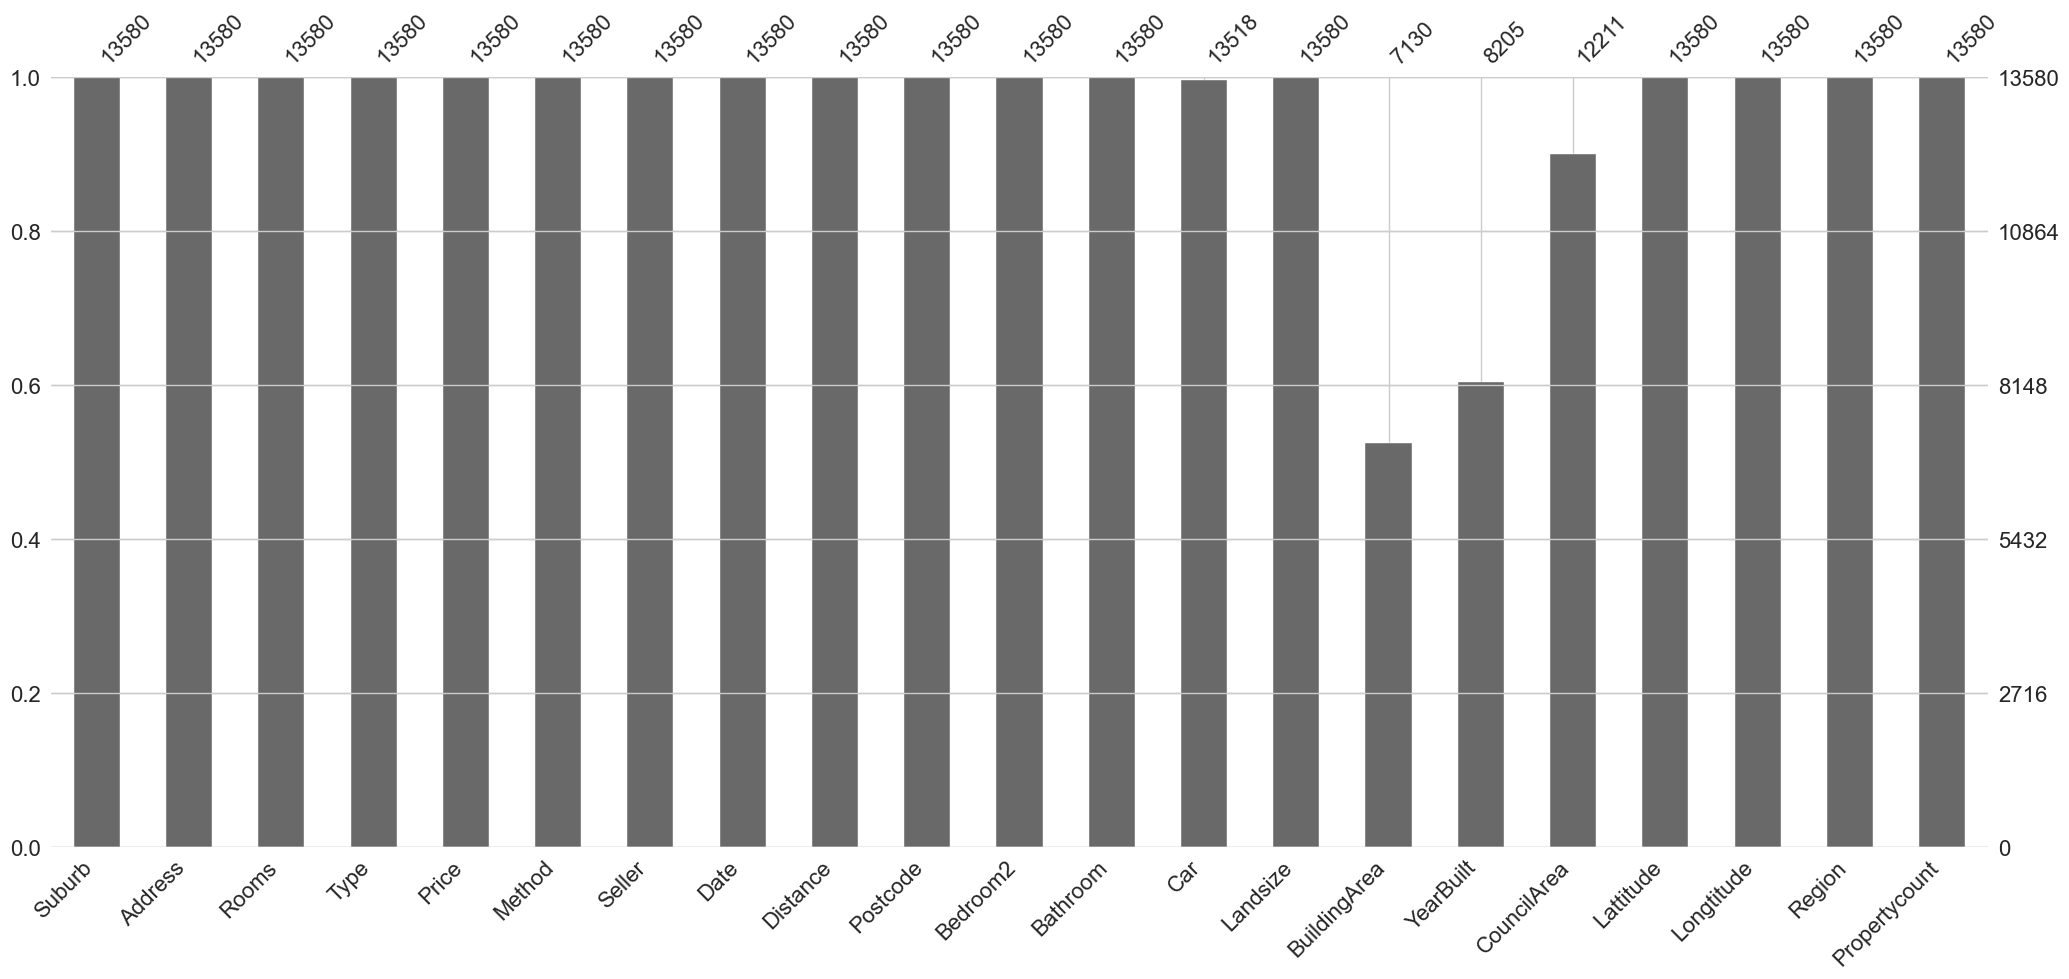

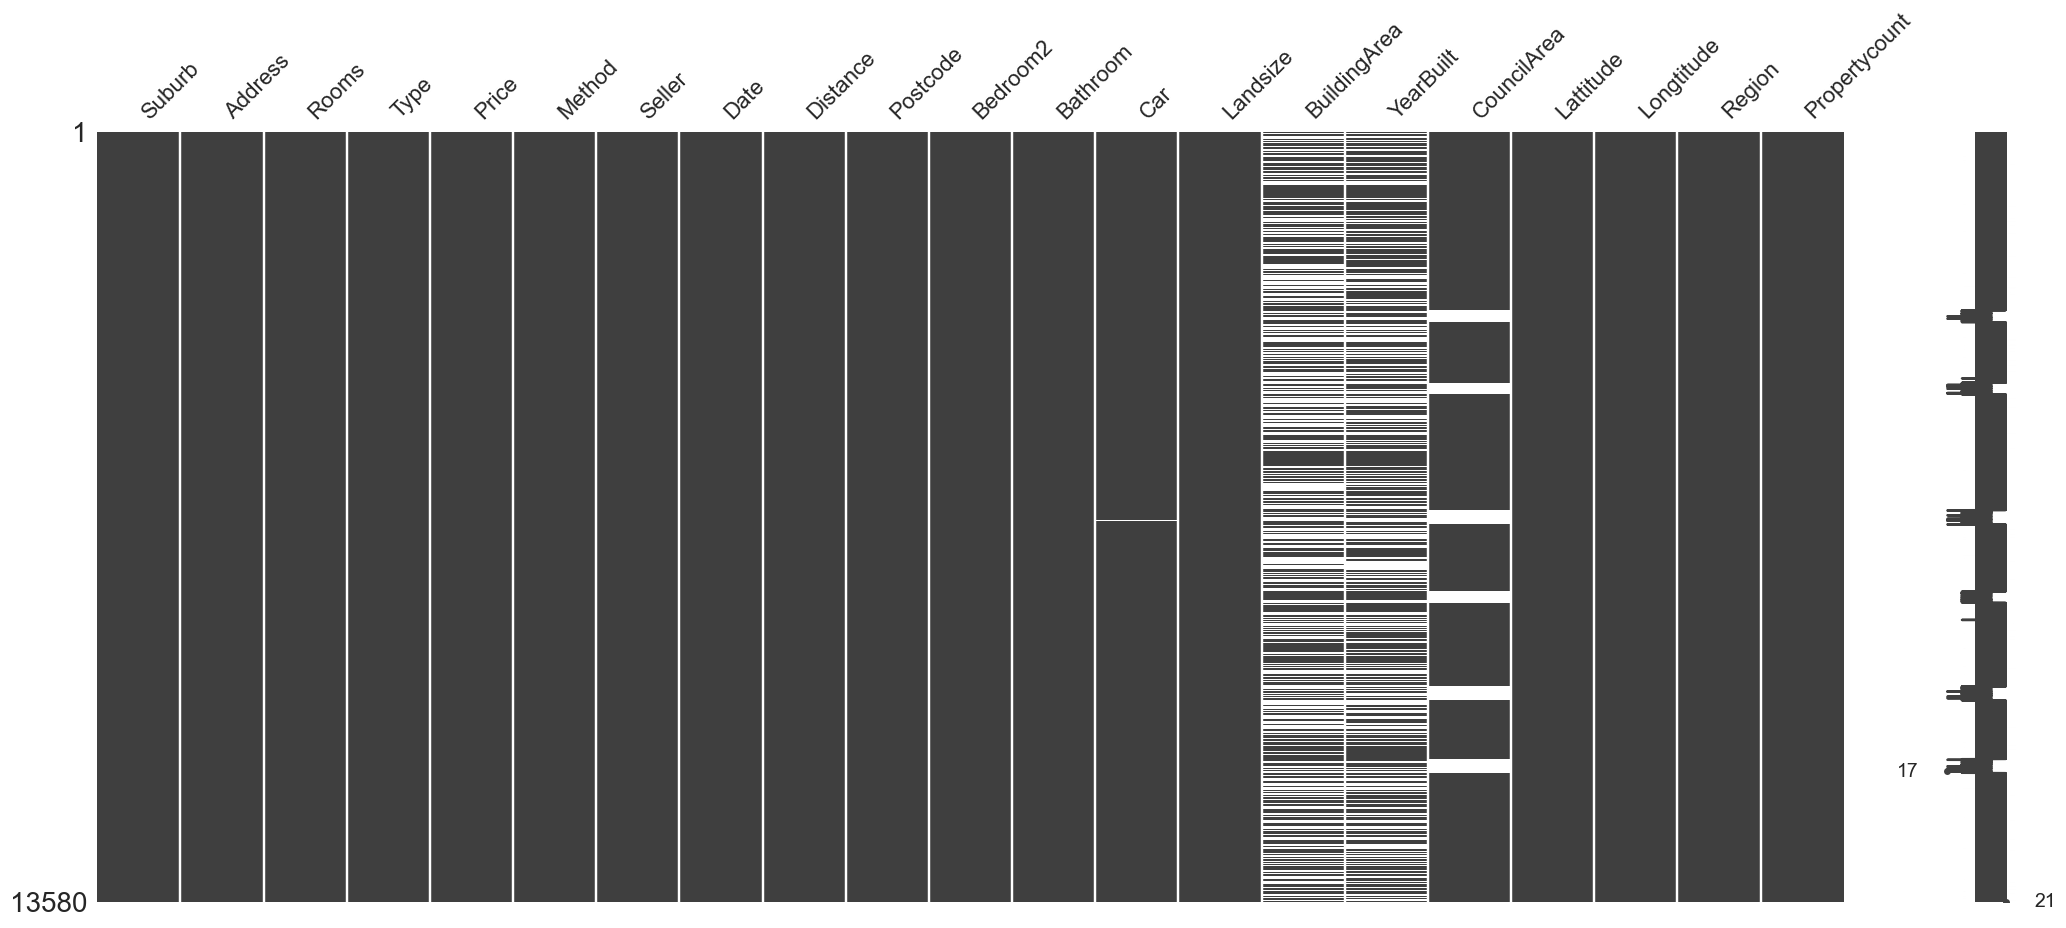

In [9]:
msno.bar(df)
msno.matrix(df)

plt.show()

<div class="alert alert-info" role="alert">
There are quite a few null values present in the data from the above charts, especially in the BuildingArea and YearBuilt columns. 
</div>

In [10]:
df[df.duplicated()]

Empty DataFrame
Columns: [Suburb, Address, Rooms, Type, Price, Method, Seller, Date, Distance, Postcode, Bedroom2, Bathroom, Car, Landsize, BuildingArea, YearBuilt, CouncilArea, Lattitude, Longtitude, Region, Propertycount]
Index: []

[0 rows x 21 columns]

<div class="alert alert-info" role="alert">
No duplicate values present in the data which is a good sign. 
</div>

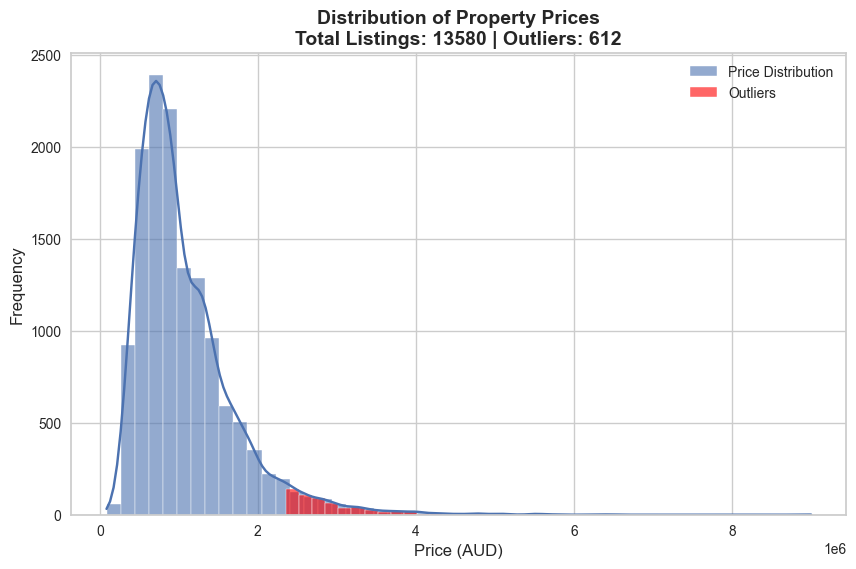

In [11]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

# creating the outlier threshold
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Price'] < lower_bound) | (df['Price'] > upper_bound)]
num_outliers = len(outliers)
total_listings = len(df)

plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=50, kde=True, color="#4C72B0", alpha=0.6, label="Price Distribution")
sns.histplot(outliers['Price'], bins=40, color="red", alpha=0.6, label="Outliers") # plotting outliers

plt.title(f"Distribution of Property Prices\nTotal Listings: {total_listings} | Outliers: {num_outliers}", 
          fontsize=14, fontweight="bold")
plt.xlabel("Price (AUD)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend()

plt.show()

<div class="alert alert-info" role="alert">
There are a few outliers present in the data but we cannot remove them since in real life there are outlier prices, for those looking for luxiourious or high-end homes, and it is important to accurately predict the values of these properties. A suitable metric RMSLE will be chosen to go around this issue.
</div>

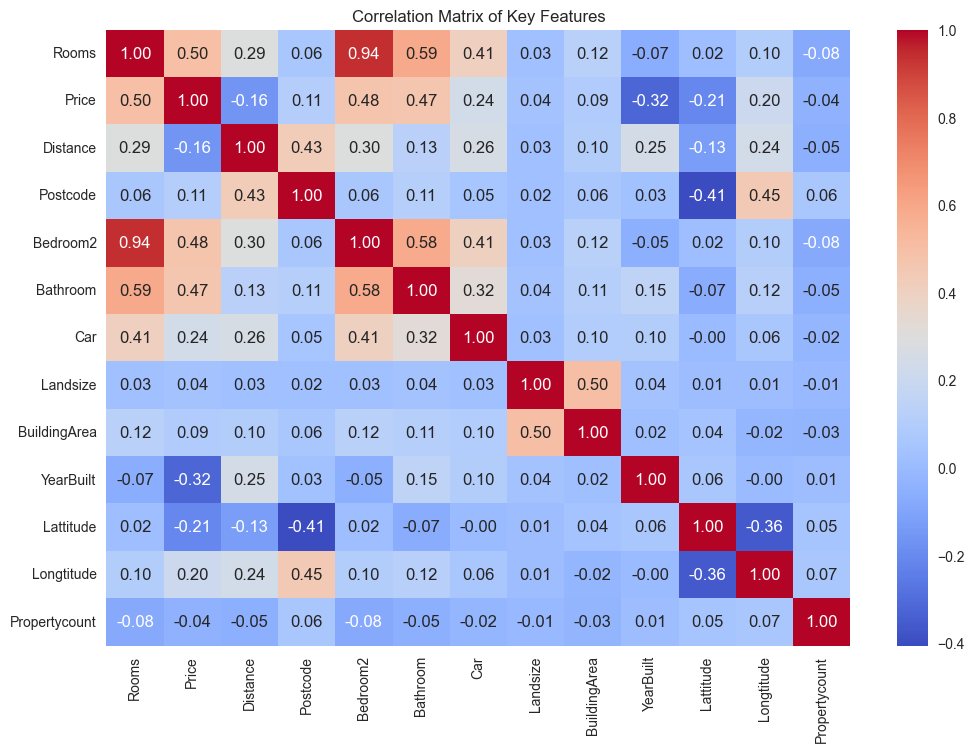

In [12]:
plt.figure(figsize=(12, 8))
corr_matrix = df.corr(numeric_only = True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Key Features")
plt.show()

<div class="alert alert-info" role="alert">
There is some correlation present in the data, the one which we are more concerned about is the Rooms and Bedroom2 columns which shows a correlation of 94%.
</div>

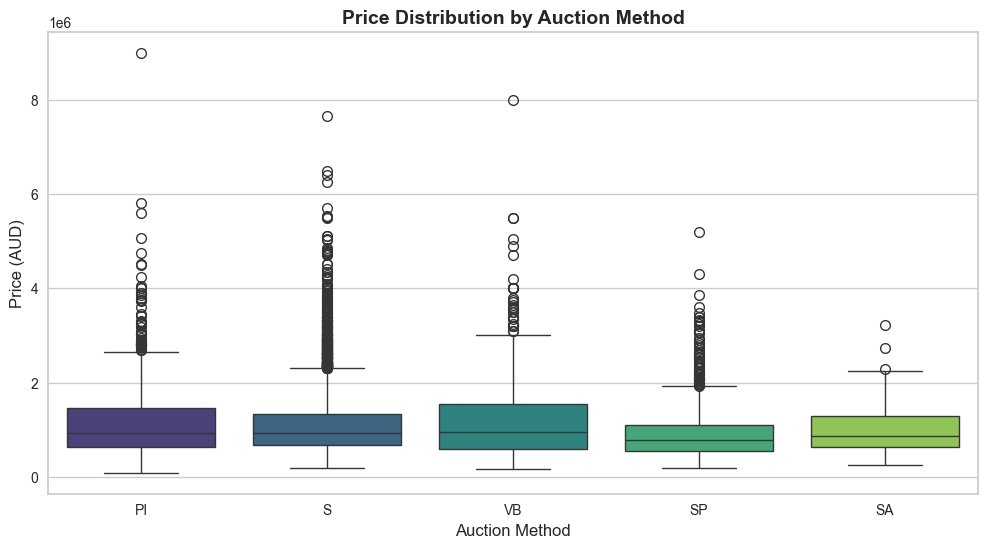

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Method", y="Price", palette="viridis")

plt.title("Price Distribution by Auction Method", fontsize=14, fontweight="bold")
plt.xlabel("Auction Method", fontsize=12)
plt.ylabel("Price (AUD)", fontsize=12)
plt.xticks(fontsize=10)
plt.show()

<div class="alert alert-info" role="alert">
Price is quite evenly distributed among the different auction methods, however some methods like S (property sold) and PI (property passed in) which have very wide price ranges.
</div>

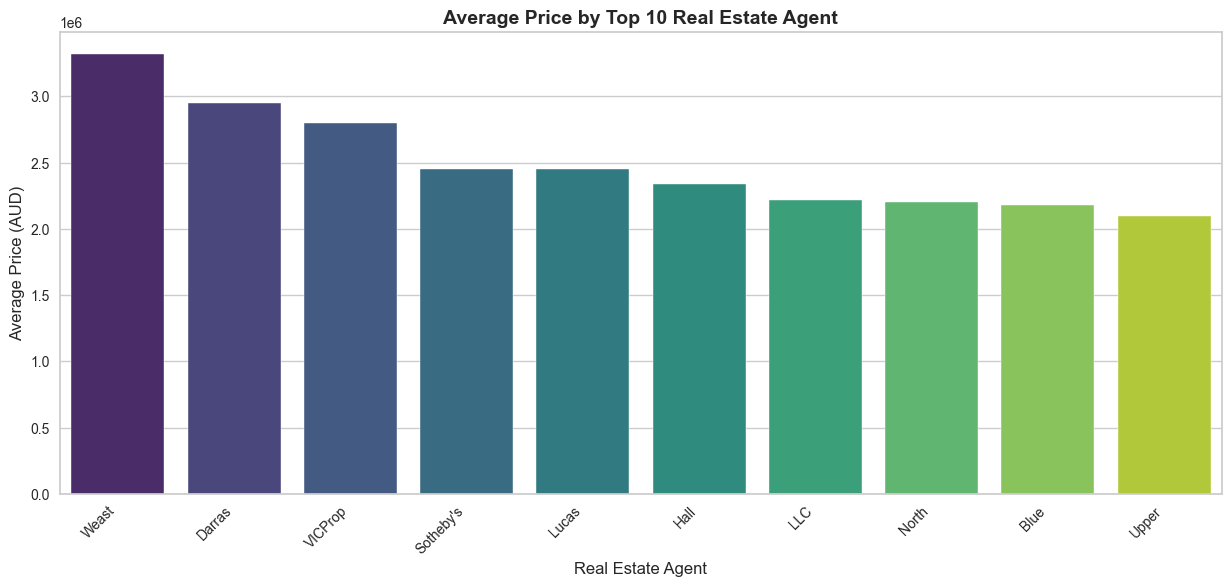

In [14]:
plt.figure(figsize=(15, 6))
avg_price_by_seller = df.groupby("Seller")["Price"].mean().sort_values(ascending=False).head(10)

sns.barplot(x=avg_price_by_seller.index, y=avg_price_by_seller.values, palette="viridis")

plt.title("Average Price by Top 10 Real Estate Agent", fontsize=14, fontweight="bold")
plt.xlabel("Real Estate Agent", fontsize=12)
plt.ylabel("Average Price (AUD)", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.show()

<div class="alert alert-info" role="alert">
This is another important column, certain real estate agents will be able to sell the house at higher and better prices as compared to others. From the graph "Weast" and "Darras" are the top real estate agents.
</div>

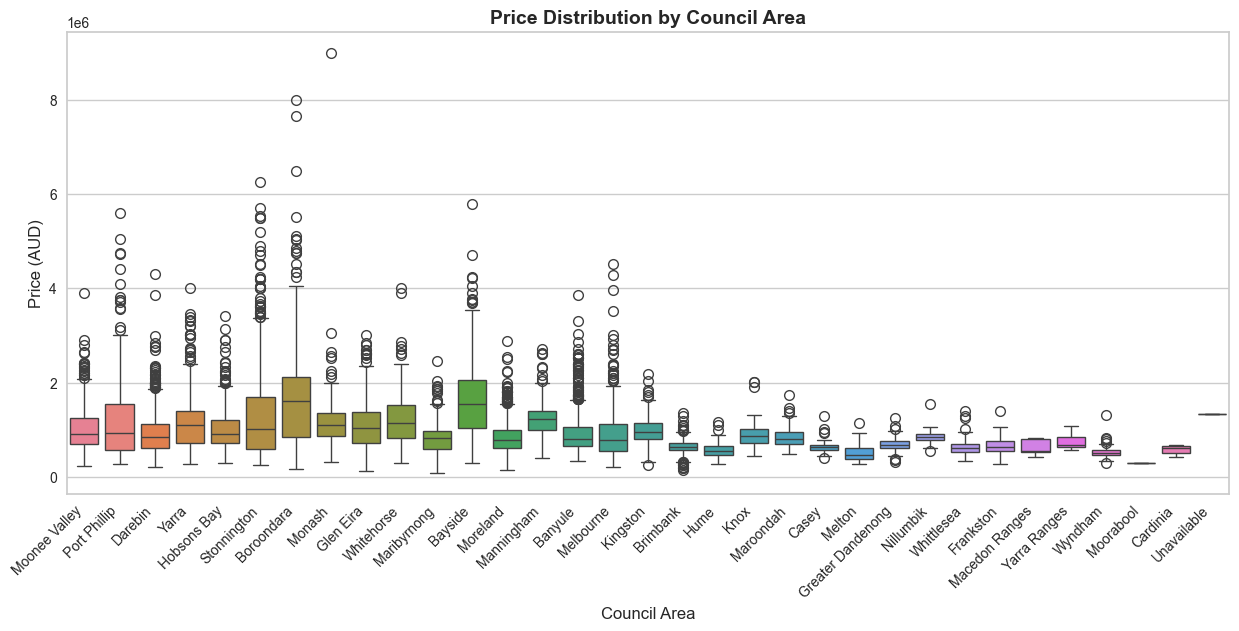

In [15]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x="CouncilArea", y="Price", hue="CouncilArea")
plt.legend().remove()

plt.xticks(rotation=45, ha="right", fontsize=10)
plt.title("Price Distribution by Council Area", fontsize=14, fontweight="bold")
plt.xlabel("Council Area", fontsize=12)
plt.ylabel("Price (AUD)", fontsize=12)
plt.show()

<div class="alert alert-info" role="alert">
The price distribution can also be seen across the different council areas, houses in some councils tend to be priced much higher as compared to those in other councils. This could be due to differences in location desirability, amenities, infrastructure, demand, and socio-economic factors.
</div>

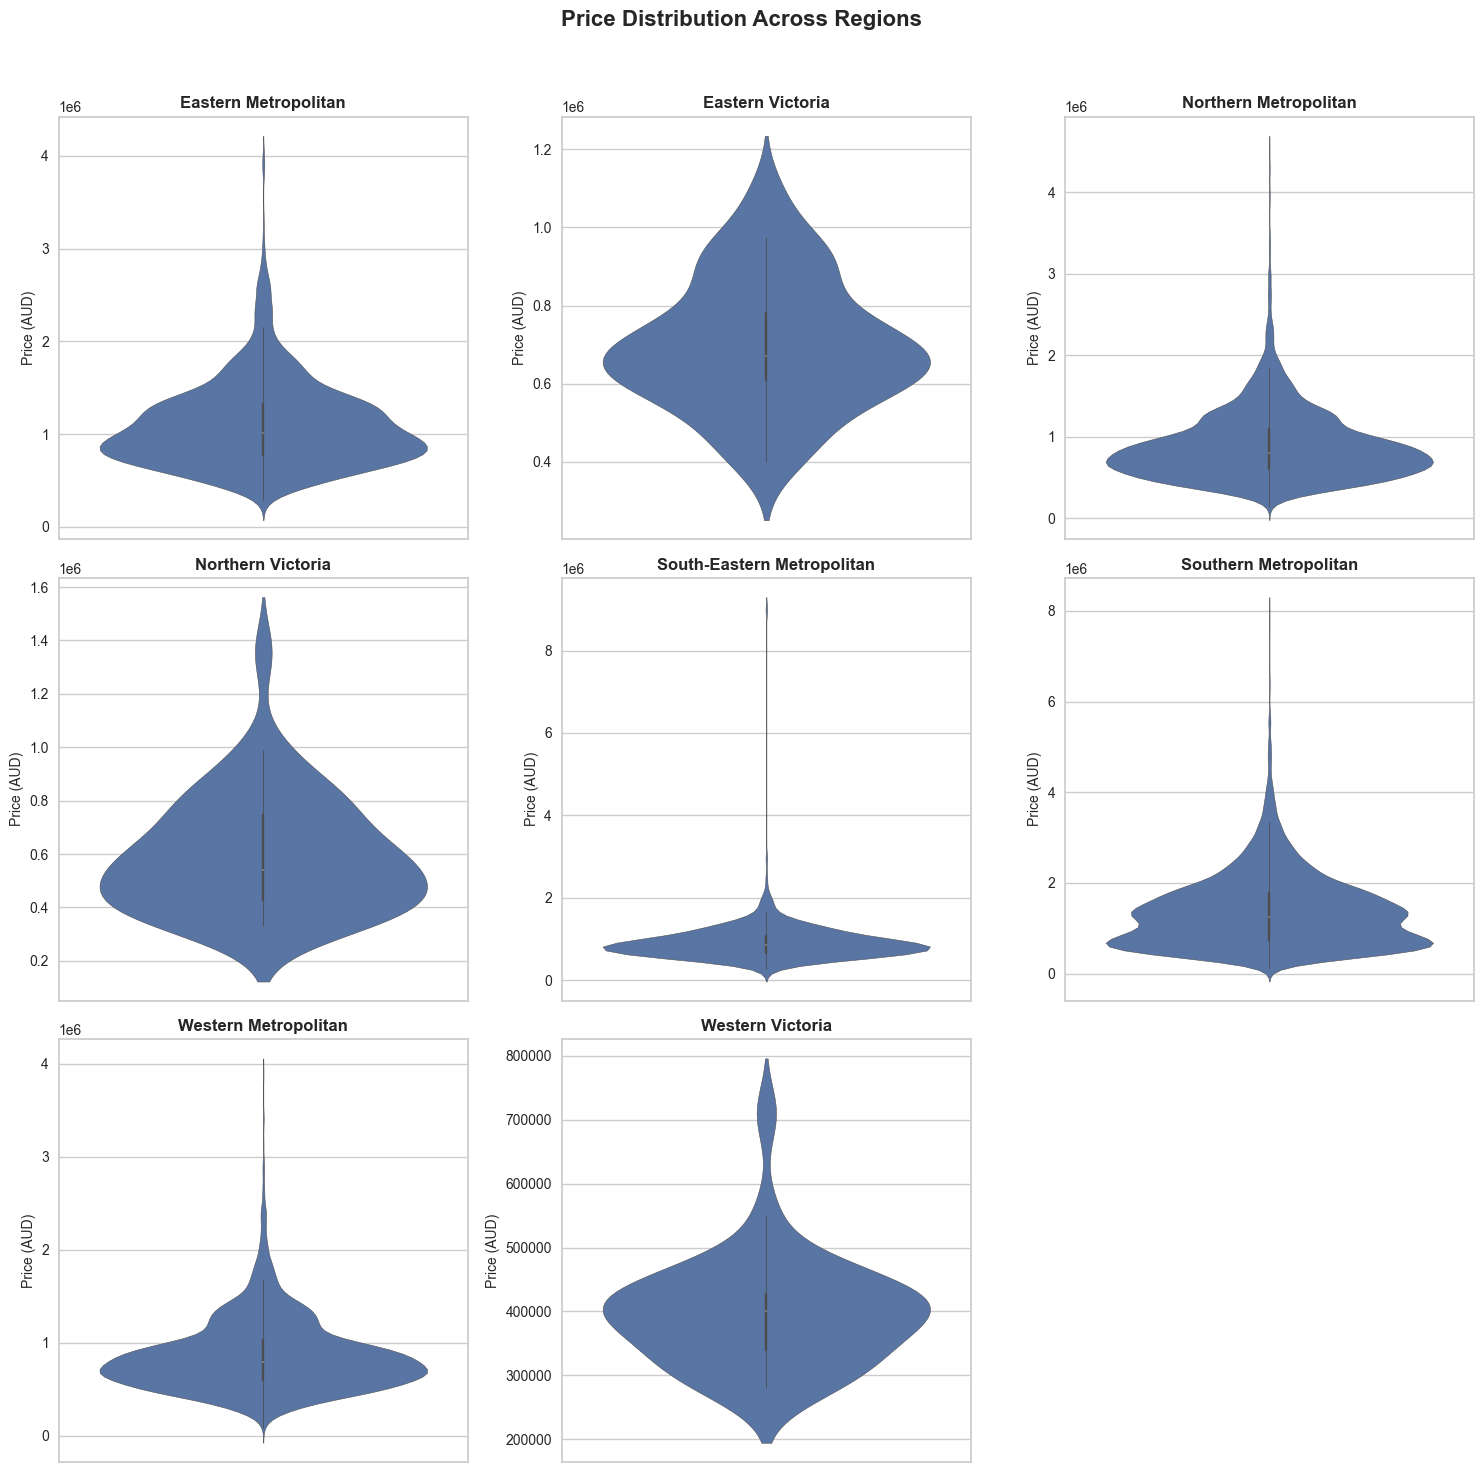

In [16]:
regions = sorted(df["Region"].dropna().unique())  
num_regions = len(regions)

cols = 3
rows = math.ceil(num_regions / cols)

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))  
fig.suptitle("Price Distribution Across Regions", fontsize=16, fontweight="bold")

axes = axes.flatten()

for i, region in enumerate(regions):
    sns.violinplot(data=df[df["Region"] == region], y="Price", ax=axes[i])
    axes[i].set_title(region, fontsize=12, fontweight="bold")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Price (AUD)", fontsize=10)
    axes[i].tick_params(axis='x', which='both', bottom=False)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])  
plt.show()

<div class="alert alert-info" role="alert">
A lot of variability in price can also be seen across the different regions as well
</div>

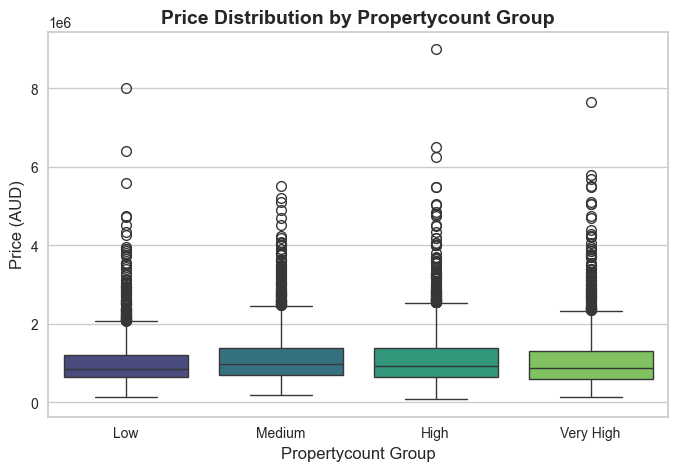

In [17]:
plt.figure(figsize=(8, 5))
sns.boxplot(
    x=pd.qcut(df['Propertycount'], q=4, labels=["Low", "Medium", "High", "Very High"]),
    y=df['Price'],
    data=df,
    palette="viridis"
)

plt.title("Price Distribution by Propertycount Group", fontsize=14, fontweight="bold")
plt.xlabel("Propertycount Group", fontsize=12)
plt.ylabel("Price (AUD)", fontsize=12)
plt.show()

<div class="alert alert-info" role="alert">
The price distribution across the different property count groups is also quite consistent
</div>

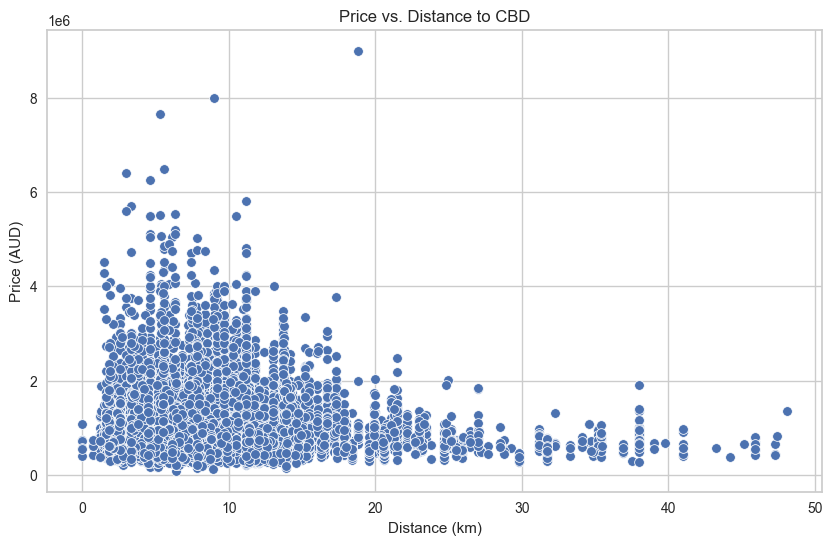

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Distance', y='Price')
plt.title("Price vs. Distance to CBD")
plt.xlabel("Distance (km)")
plt.ylabel("Price (AUD)")
plt.show()

<div class="alert alert-info" role="alert">
Here, it alligns with expectation with those homes near the CBD having a higher price as compared to those which are further from the area. 
</div>

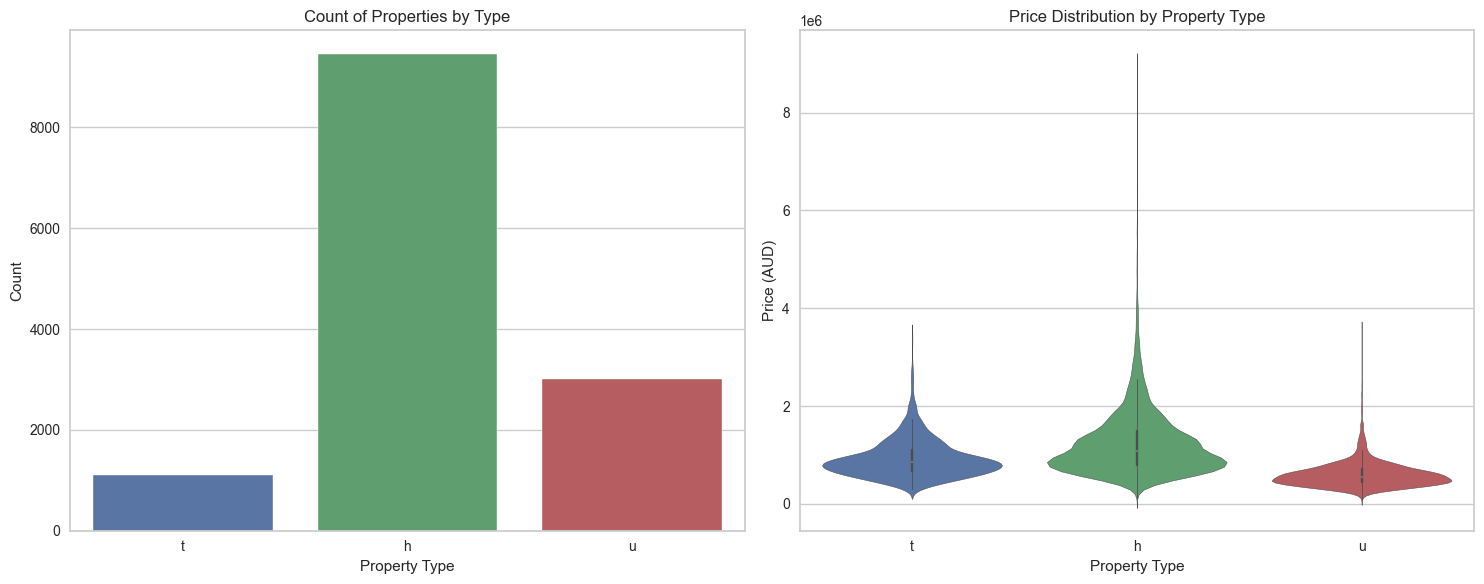

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.countplot(x='Type', data=df, hue='Type', ax=axes[0])
axes[0].set_title("Count of Properties by Type")
axes[0].set_xlabel("Property Type")
axes[0].set_ylabel("Count")

sns.violinplot(x='Type', y='Price', data=df, hue='Type', ax=axes[1])
axes[1].set_title("Price Distribution by Property Type")
axes[1].set_xlabel("Property Type")
axes[1].set_ylabel("Price (AUD)")

plt.tight_layout()
plt.show()

<div class="alert alert-info" role="alert">
Here it can be seen that the majority of property types are h (house,cottage,villa,semi,terrace) and it even has the highest range of property prices, however taking a look at the price distribution across the different property types, there is no signficant difference. 
</div>

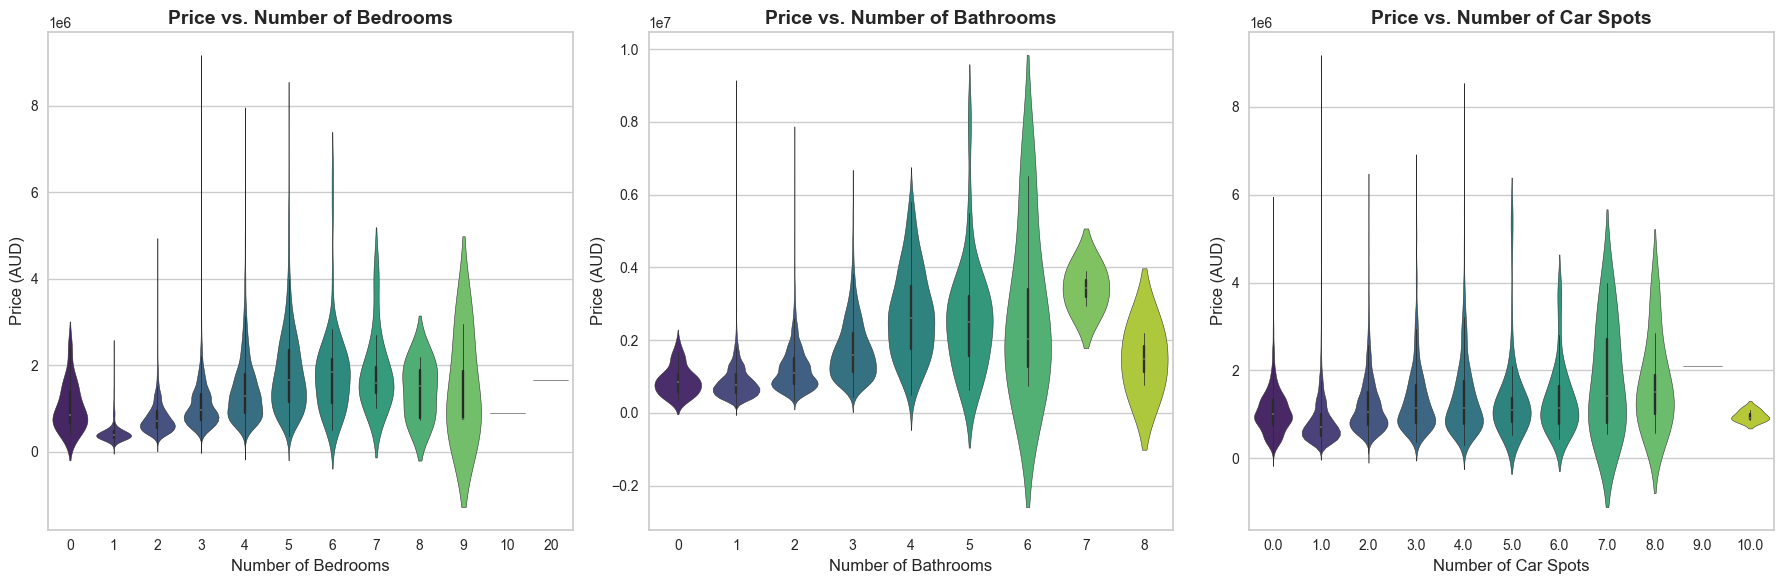

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.violinplot(data=df, x="Bedroom2", y="Price", palette="viridis", ax=axes[0])
axes[0].set_title("Price vs. Number of Bedrooms", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Number of Bedrooms", fontsize=12)
axes[0].set_ylabel("Price (AUD)", fontsize=12)

sns.violinplot(data=df, x="Bathroom", y="Price", palette="viridis", ax=axes[1])
axes[1].set_title("Price vs. Number of Bathrooms", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Number of Bathrooms", fontsize=12)
axes[1].set_ylabel("Price (AUD)", fontsize=12)

sns.violinplot(data=df, x="Car", y="Price", palette="viridis", ax=axes[2])
axes[2].set_title("Price vs. Number of Car Spots", fontsize=14, fontweight="bold")
axes[2].set_xlabel("Number of Car Spots", fontsize=12)
axes[2].set_ylabel("Price (AUD)", fontsize=12)

plt.tight_layout()
plt.show()

<div class="alert alert-info" role="alert">
There's a general positive correlation between the number of bedrooms, bathrooms, and car spots with the price of the property (in AUD). As the number for each feature increases, the price tends to increase as well.

The distribution of prices (AUD) for properties varies significantly based on the number of bedrooms, bathrooms, and car spots. Some properties may have a higher price range and other can have lower, which can be due to other factors not captured in the chart.
</div>

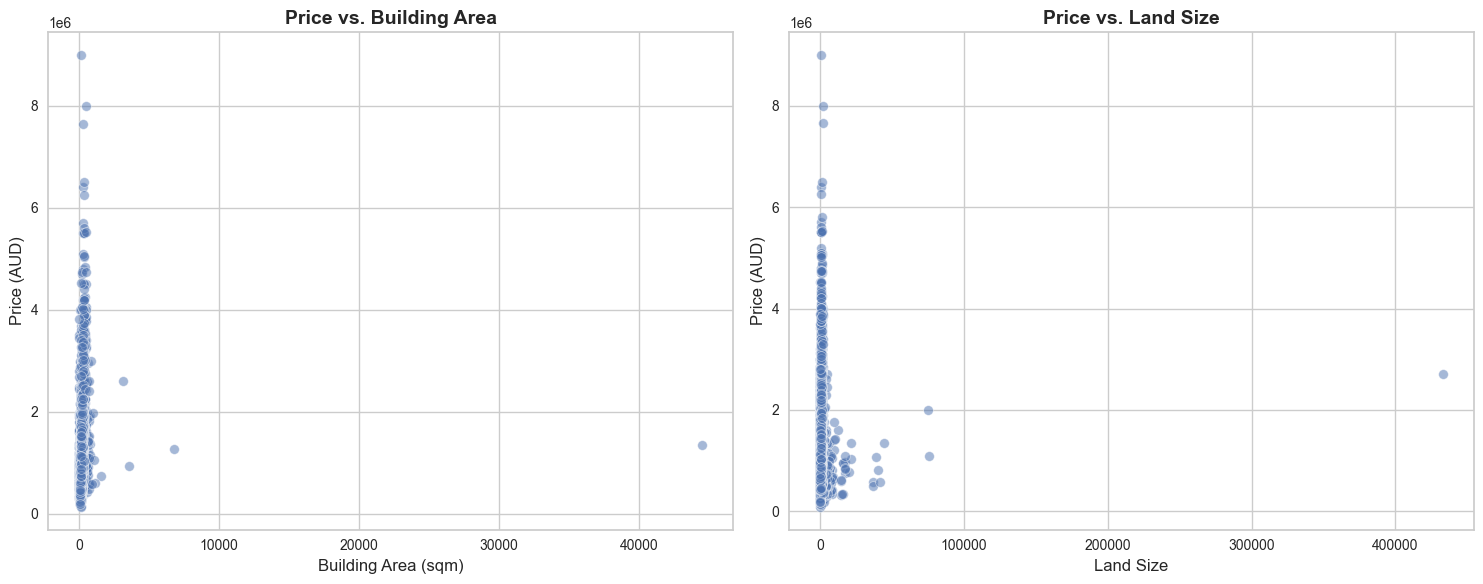

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.scatterplot(data=df, x="BuildingArea", y="Price", alpha=0.5, color="#4C72B0", ax=axes[0])
axes[0].set_title("Price vs. Building Area", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Building Area (sqm)", fontsize=12)
axes[0].set_ylabel("Price (AUD)", fontsize=12)

sns.scatterplot(data=df, x="Landsize", y="Price", alpha=0.5, color="#4C72B0", ax=axes[1])
axes[1].set_title("Price vs. Land Size", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Land Size", fontsize=12)
axes[1].set_ylabel("Price (AUD)", fontsize=12)

plt.tight_layout()
plt.show()

<div class="alert alert-info" role="alert">
Both building area and land size have very similar distribution when comparing with price column. This means that we can keep only one of the column.
</div>

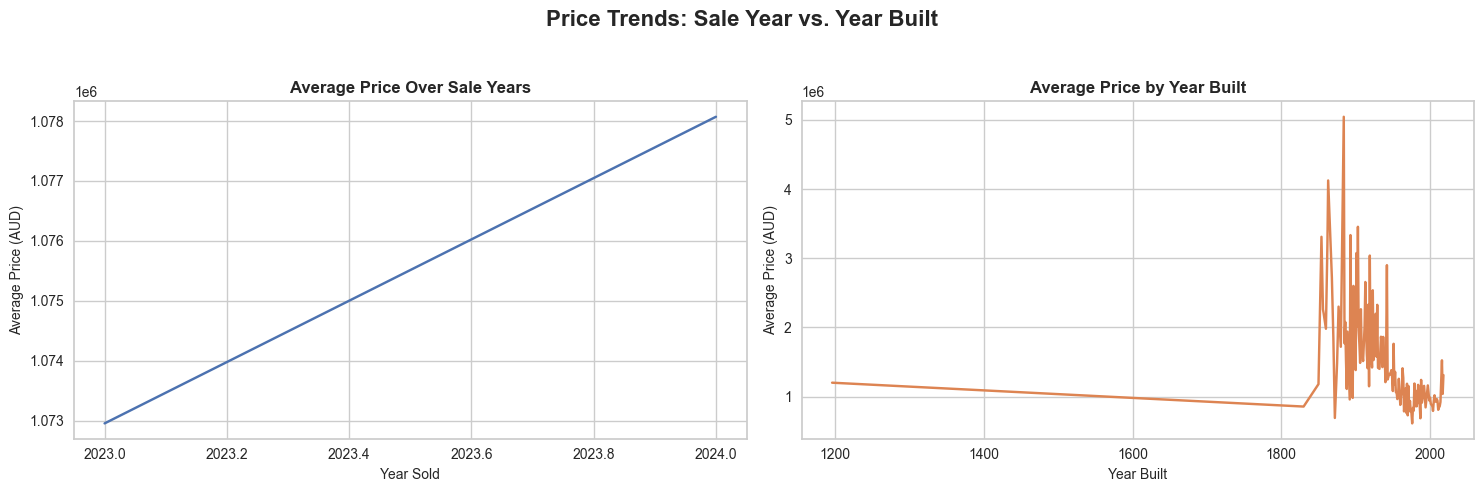

In [22]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

avg_price_yearly = df.groupby(df['Date'].dt.year)['Price'].mean().reset_index()
avg_price_built = df.groupby('YearBuilt')['Price'].mean().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(15, 5))  
fig.suptitle("Price Trends: Sale Year vs. Year Built", fontsize=16, fontweight="bold")

sns.lineplot(data=avg_price_yearly, x='Date', y='Price', ax=axes[0], color="#4C72B0")
axes[0].set_title("Average Price Over Sale Years", fontsize=12, fontweight="bold")
axes[0].set_xlabel("Year Sold", fontsize=10)
axes[0].set_ylabel("Average Price (AUD)", fontsize=10)

sns.lineplot(data=avg_price_built, x='YearBuilt', y='Price', ax=axes[1], color="#DD8452")
axes[1].set_title("Average Price by Year Built", fontsize=12, fontweight="bold")
axes[1].set_xlabel("Year Built", fontsize=10)
axes[1].set_ylabel("Average Price (AUD)", fontsize=10)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

<div class="alert alert-info" role="alert">
Average price is increasing quite linearly over the years of sale price and taking a look at the year built chart, it can be seen that homes built around the 1800-1900 period are valued quite highly. 
</div>

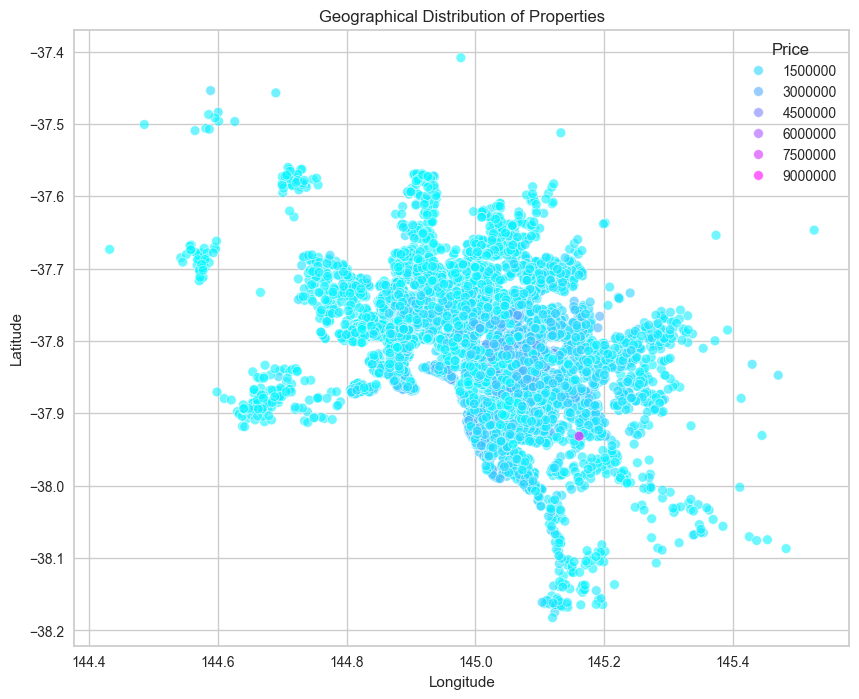

In [23]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Longtitude', y='Lattitude', hue='Price', palette='cool', alpha=0.6)
plt.title("Geographical Distribution of Properties")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Price", bbox_to_anchor=(1, 1))
plt.show()

<div class="alert alert-info" role="alert">
Looks like most of the high prices are clustered in the center regions, this could be a useful feature when we build the model
</div>

## Data Preparation

In [24]:
# Numerical Columns
numerical_columns = ["Distance", "Bedroom2", "Bathroom", 
                     "Car", "Landsize", "YearBuilt", 
                     "Lattitude", "Longtitude"]

ordinal_columns = {
    'Rooms': sorted(df['Rooms'].unique()),  # 'Rooms' is numeric, so sorted naturally
    'Type': ['t', 'h', 'u'],  # Townhouse < House < Unit (example order)
    'Method': ['PI', 'S', 'SP', 'VB', 'SA', 'SS', 'W', 'NB', 'PN', 'SN', 'N/A'],  # Auction method orders
}

In [25]:
ignore_feat = ["Propertycount", "Postcode", "BuildingArea", "Address"]

reg1 = setup(
    data=df, 
    target="Price",
    ignore_features=ignore_feat,
    imputation_type="iterative",
    numeric_imputation="knn", 
    categorical_imputation="mode",
    ordinal_features=ordinal_columns,
    numeric_features=numerical_columns,
    categorical_features=["Suburb", "Type", "Method", "Seller", "CouncilArea", "Region"], 
    create_date_columns=["day", "month", "year"],
    polynomial_features=True,
    polynomial_degree=2,
    remove_multicollinearity=True, # default threshold = 0.9
    multicollinearity_threshold=0.55, # changing 0.9 to 0.55
    normalize=True,
    session_id=123,
    log_experiment="dagshub", 
    experiment_name='house_pricing',
    fold=10, # most common is 10 folds
    feature_selection=True,
    feature_selection_estimator='rf',
    n_features_to_select=0.8
)

Accessing as gangula-karthik

Please insert your repository owner_name/repo_name: gangula-karthik/MLOps-Assignment


Initialized MLflow to track repo "gangula-karthik/MLOps-Assignment"

Repository gangula-karthik/MLOps-Assignment initialized!

<div class="alert alert-info" role="alert">

- The dataset (df) is passed as input data for modeling.<br>
- The target variable is set to Price, which is the variable you want to predict.<br>
- Features to Ignore: The features Propertycount, Postcode, BuildingArea, and Address will be ignored during the analysis.<br>
- Imputation Type: Set to iterative, which uses an iterative method for filling missing values.<br>
- Numeric Imputation: Uses K-Nearest Neighbors (KNN) for numeric feature imputation.<br>
- Categorical Imputation: Uses the mode (most frequent value) for imputing missing categorical values.<br>
- Ordinal Features: The list ordinal_columns will be used for ordinal features (likely predefined).<br>
- Numeric Features: The list numerical_columns will be used for numeric features (likely predefined).<br>
- Categorical Features: The categorical features specified are Suburb, Type, Method, Seller, CouncilArea, and Region.<br>
- Date Features: Creates new date-based columns such as day, month, and year from any existing date columns in the dataset.<br>
- Polynomial Features: Generates polynomial features (degree 2) to allow for non-linear relationships in the model.<br>
- Multicollinearity: Remove Multicollinearity: Enables the removal of highly correlated features. Multicollinearity Threshold: Features with a correlation coefficient greater than 0.75 will be removed (threshold changed from the default 0.9).<br>
- Normalization: Normalizes numeric features to ensure all variables are on the same scale.<br>
- Cross-Validation: Uses 10-fold cross-validation to evaluate the model.<br>
- Feature Selection: Enables feature selection with a random forest estimator. Selects 80% of the most important features based on the random forest feature importances.<br>
- Experiment Logging: Logs the experiment to dagshub with the experiment name house_pricing.<br>
- Session ID: Sets the session ID to 123 to ensure reproducibility.<br>
</div>

In [26]:
reg1.dataset_transformed

Longtitude  Suburb Bedroom2  Type_1.0 Landsize  Seller Lattitude  \
697      1.057575         1.030090           1.498434          0.457889   
9836     0.624531        -0.074108           0.268691          0.876294   
2814    -0.221234         0.526364           0.514299          0.095459   
8588     0.764298         0.047861           0.423902         -0.525889   
7339     0.154061         1.882089           0.099836          0.450568   
...           ...              ...                ...               ...   
13413    0.199967        -0.154179          -0.642103          0.455574   
10948    0.797924         1.369787          -0.026379         -2.889197   
12172    0.379208         2.402400           0.427313         -1.050578   
2561    -0.061730        -0.467694          -0.328271          0.232580   
1633    -0.295357        -0.858058          -0.642103          0.237030   

       Date_month Lattitude  Distance Lattitude  Bathroom Lattitude  \
697                0.411056           -0.174110           -0.680528   
9836              -0.788823           -1.319590           -0.690206   
2814               0.415611            0.844329            0.774084   
8588               0.802931           -0.636553            0.768277   
7339              -0.784273           -0.093109           -2.141313   
...                     ...                 ...                 ...   
13413              0.013253            0.655541            2.223129   
10948              0.015906            0.199166           -0.679637   
12172             -1.564257            0.775877           -2.127671   
2561               0.018519            1.114535            0.773115   
1633              -0.768305            0.405252            0.774820   

       Car Lattitude  Landsize Lattitude  YearBuilt Lattitude  \
697        -0.412113           -0.848490             0.259388   
9836       -0.419113           -0.037212            -0.744303   
2814       -0.408086           -0.196169             2.055979   
8588       -0.416487           -0.139320             0.180360   
7339       -0.416432            0.075458             1.355284   
...              ...                 ...                  ...   
13413       1.688144            0.567146            -0.012628   
10948      -0.411469            0.160064            -0.985987   
12172      -0.409853           -0.139347             0.542017   
2561        0.639328            0.359854             2.016611   
1633        0.640561            0.567146             0.073744   

       YearBuilt Longtitude  Lattitude Region_Southern Metropolitan    Price  
697               -0.250397                               -1.389705  2100000  
9836               0.530221                               -1.396733  1160000  
2814              -1.990100                                0.718574  1400000  
8588              -0.310429                               -1.394097  1175000  
7339              -1.508497                               -1.394041  1710000  
...                     ...                                     ...      ...  
13413             -0.055301                               -1.391076   546000  
10948              1.003778                               -1.389059  1850000  
12172             -0.497777                               -1.387437  2245000  
2561              -1.983329                                0.718574  1350000  
1633               0.024005                                0.718574   434000  

[13580 rows x 13 columns]

In [28]:
print(f'Categorical features: {reg1._fxs["Categorical"]}')
print(f'Ordinal features: {reg1._fxs["Ordinal"]}')
print(f'Numeric features: {reg1._fxs["Numeric"]}')

Categorical features: ['Suburb', 'Type', 'Method', 'Seller', 'CouncilArea', 'Region']
Ordinal features: {'Rooms': [1, 2, 3, 4, 5, 6, 7, 8, 10], 'Type': ['t', 'h', 'u'], 'Method': ['PI', 'S', 'SP', 'VB', 'SA', 'SS', 'W', 'NB', 'PN', 'SN', 'N/A']}
Numeric features: ['Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'YearBuilt', 'Lattitude', 'Longtitude']


In [37]:
processed_data_path = "../../data/processed/melbourne_transformed.csv"
reg1.dataset_transformed.to_csv(processed_data_path, index=False)
print(f"Transformed dataset saved at: {processed_data_path}")

Transformed dataset saved at: ../../data/processed/melbourne_transformed.csv


<div class="alert alert-info" role="alert">

Saving the transformed dataset in the processed folder. The data folder is tracked using dvc to ensure reproducibility of experiments and easy data versioning
</div>

## Modelling

In [33]:
best = reg1.compare_models()

2025/02/26 14:43:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/02/26 14:43:58 INFO mlflow.tracking._tracking_service.client: 🏃 View run CatBoost Regressor at: https://dagshub.com/gangula-karthik/MLOps-Assignment.mlflow/#/experiments/0/runs/7bc8c43d454341668831393938228b9f.
2025/02/26 14:43:58 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/gangula-karthik/MLOps-Assignment.mlflow/#/experiments/0.
2025/02/26 14:44:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/02/26 14:44:21 INFO mlflow.tracking._tracking_service.client: 🏃 View run Light Gradient Boosting Machine at: https://dagshub.com/gangula-karthik/MLOps-Assignment.mlflow/#/experiments/0/runs/5a77d346787a41af9013afaaaa30f51

<div class="alert alert-info" role="alert">

Extra trees regressor was chosen as the best model since it has the highest RMSLE score. RMSLE is particularly useful for house price regression because house price data is often right-skewed, with many lower-priced properties and fewer high-end ones. RMSLE reduces the impact of large price discrepancies and emphasizes relative error.
</div>

In [34]:
best = create_model('et')

2025/02/26 14:52:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/02/26 14:53:25 INFO mlflow.tracking._tracking_service.client: 🏃 View run Extra Trees Regressor at: https://dagshub.com/gangula-karthik/MLOps-Assignment.mlflow/#/experiments/0/runs/5323c4c8cea140eea615e563797b9f09.
2025/02/26 14:53:25 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/gangula-karthik/MLOps-Assignment.mlflow/#/experiments/0.


<div class="alert alert-info" role="alert">

The model is showing consistent performance across all the folds, indicating good generalization and robustness.

</div>

## Hyperparameter Tuning

In [36]:
best.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 123,
 'verbose': 0,
 'warm_start': False}

<div class="alert alert-info" role="alert">

These are the current model parameters
</div>

In [37]:
tuned_model = tune_model(
    best, 
    n_iter=25, 
    return_tuner=True, 
    search_library='optuna', 
    choose_better=True, 
    optimize='RMSLE'
) 

[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000504 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1837
[LightGBM] [Info] Number of data points in the train set: 8516, number of used features: 17
[LightGBM] [Info] Start training from score 1.610263
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000514 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1837
[

2025/02/26 15:46:19 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/02/26 15:46:48 INFO mlflow.tracking._tracking_service.client: 🏃 View run Extra Trees Regressor at: https://dagshub.com/gangula-karthik/MLOps-Assignment.mlflow/#/experiments/0/runs/e0aa8022936c4432bd2c2bd5dcdb21ad.
2025/02/26 15:46:48 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/gangula-karthik/MLOps-Assignment.mlflow/#/experiments/0.


<div class="alert alert-info" role="alert">

Here, will be optimizing for RMSLE score using Optuna which uses Bayesian optimization to model the objective function probabilistically, balancing exploration and exploitation for efficient hyperparameter tuning. It adapts based on previous trials, prunes poorly performing ones early, and requires fewer evaluations to find optimal parameters compared to grid or random search.
    
Taking a look at the results, it can be seen that the best model is performing better across all the metrics as compared to the tuned model. The best model will be used instead.
</div>

## Model Evaluation

In [38]:
predict_model(best)

Suburb  Rooms Type Method         Seller       Date  Distance  \
5799   Endeavour Hills      4    h     SP        O'Brien 2024-07-15      28.5   
10596     Airport West      3    h     PI         Nelson 2024-02-25      13.5   
7471           Rosanna      3    h      S      Fletchers 2023-09-17      11.4   
2308          Hawthorn      3    h      S       Marshall 2023-11-12       4.6   
2602        Kensington      3    t      S         Edward 2024-07-01       3.4   
...                ...    ...  ...    ...            ...        ...       ...   
13413         Armadale      2    u     SP  hockingstuart 2023-07-30       6.3   
10948       Canterbury      3    h     PI       Marshall 2023-07-26       9.0   
12172              Kew      4    h      S         Jellis 2023-11-27       5.6   
2561     Fitzroy North      2    h     VB         Nelson 2024-07-01       3.6   
1633            Coburg      2    u      S         Nelson 2023-09-10       7.8   

       Bedroom2  Bathroom  Car  Landsize  YearBuilt    CouncilArea  Lattitude  \
5799          4         2  2.0       669     1980.0          Casey -37.964661   
10596         3         1  1.0       585        NaN  Moonee Valley -37.720001   
7471          3         2  1.0       323     2015.0        Banyule -37.735901   
2308          3         1  1.0       342     1900.0     Boroondara -37.813999   
2602          3         2  2.0         0     1999.0      Melbourne -37.794819   
...         ...       ...  ...       ...        ...            ...        ...   
13413         2         0  0.0         0        NaN    Stonnington -37.856800   
10948         3         2  2.0       361     1995.0     Boroondara -37.820599   
12172         4         3  2.0       627        NaN     Boroondara -37.791500   
2561          2         1  1.0       184     1900.0          Yarra -37.784931   
1633          2         1  1.0         0     1965.0       Moreland -37.740501   

       Longtitude                      Region    Price  prediction_label  
5799   145.270065  South-Eastern Metropolitan   625000         769780.82  
10596  144.878006        Western Metropolitan   720000         720057.50  
7471   145.061401        Eastern Metropolitan  1012000        1047690.74  
2308   145.021194       Southern Metropolitan  1712000        1652715.00  
2602   144.921921       Northern Metropolitan   967000         933730.00  
...           ...                         ...      ...               ...  
13413  145.016098       Southern Metropolitan   546000         624095.00  
10948  145.078506       Southern Metropolitan  1850000        1749005.00  
12172  145.034805       Southern Metropolitan  2245000        2356000.00  
2561   144.988785       Northern Metropolitan  1350000        1407415.00  
1633   144.964401       Northern Metropolitan   434000         485280.00  

[4074 rows x 18 columns]

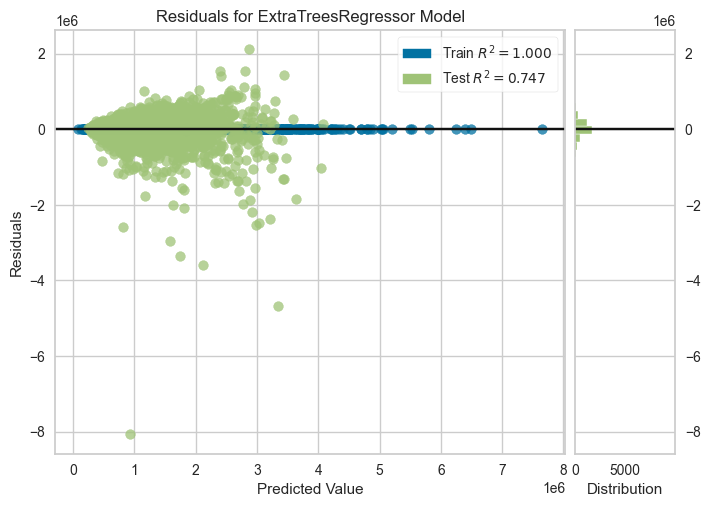

In [40]:
plot_model(best, plot='residuals', plot_kwargs={'observed': True, 'color': 'blue'})

<div class="alert alert-info" role="alert">
  
- The residuals for the training data (blue) are clustered very close to zero across all predicted values. This is consistent with the R-squared of 1.000.
- The residuals for the test data (green) are more spread out. They appear to be centered around zero, which is good. However, the spread increases as the predicted value increases, which suggests heteroscedasticity. The increasing spread of residuals for the test data as the predicted value increases suggests that the variance of the errors is not constant. This violates one of the assumptions of linear regression and indicates that the model's predictions are less reliable for higher predicted values.
</div>

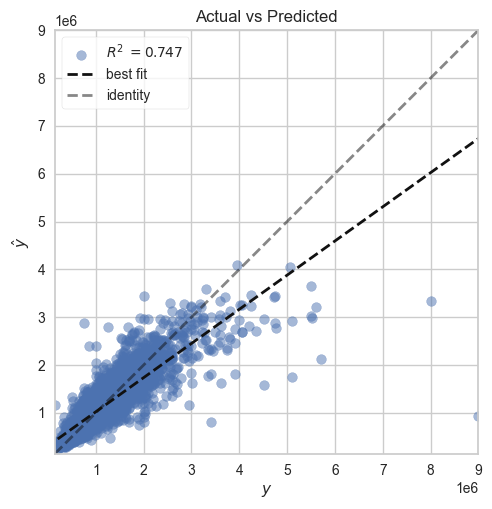

In [41]:
plot_model(best, plot='error', plot_kwargs={'alpha': 0.5, 'title': 'Actual vs Predicted'})

<div class="alert alert-info" role="alert">

The perfect R-squared on the training data combined with a lower R-squared on the test data suggests the model could be overfitting the training data.
</div>

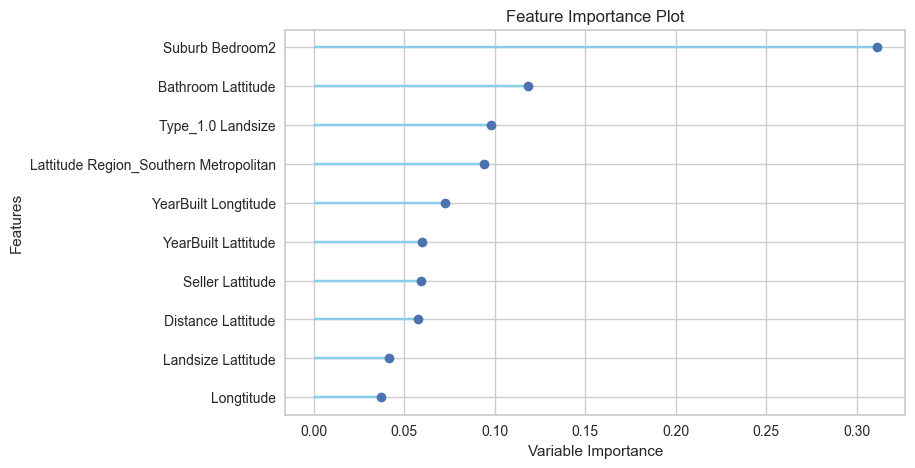

In [43]:
plot_model(best, plot='feature', plot_kwargs={'top_n': 15, 'figsize': (10,6)})

<div class="alert alert-info" role="alert">

Using the feature importance plot, the important features can be identified. The interaction effects variables which were created are ranked quite highly which shows their effectiveness.
</div>

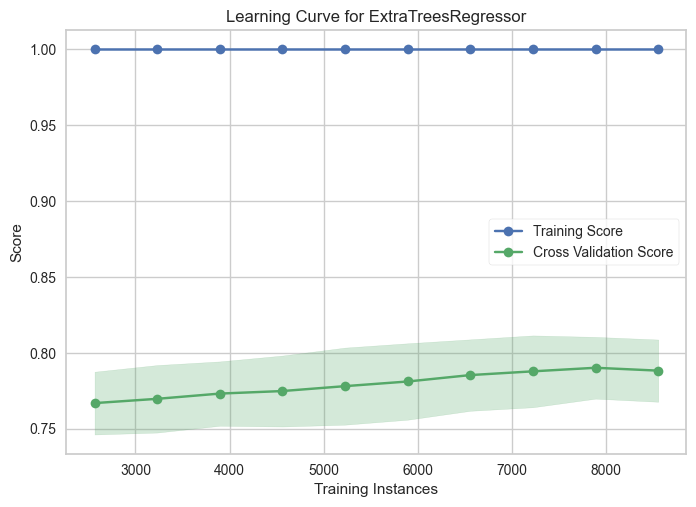

In [45]:
plot_model(best, plot='learning')

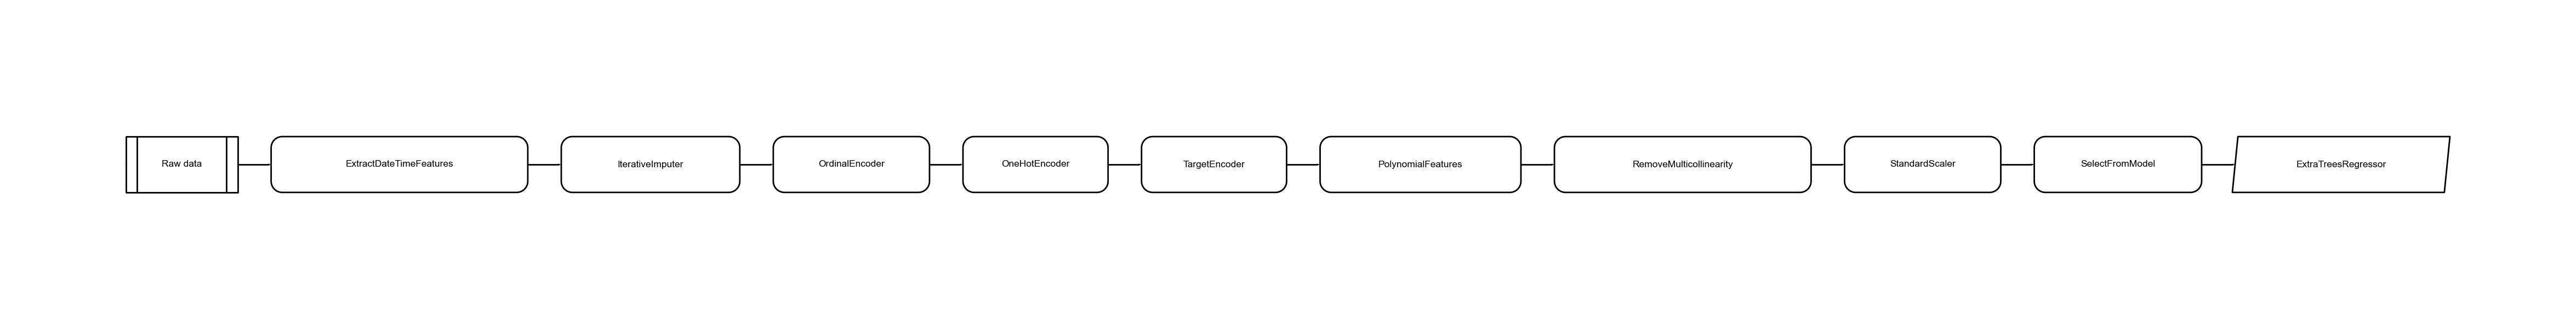

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [51]:
# to view more charts the below can be used
evaluate_model(best)

<div class="alert alert-info" role="alert">

More charts can be analysed using the evaluate model function
</div>

In [52]:
# ai explainability is also an important component
# using the below plot, we can understand how the model is arriving at its prediction
# interpret_model(best, plot = 'reason', observation = 1)

## Saving Model

In [54]:
final_model = finalize_model(best)
save_model(best, 'house_pricing_pipeline')

2025/02/26 15:51:19 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/02/26 15:51:55 INFO mlflow.tracking._tracking_service.client: 🏃 View run Extra Trees Regressor at: https://dagshub.com/gangula-karthik/MLOps-Assignment.mlflow/#/experiments/0/runs/45390f0c2ee343e5a0f8f6d806423e13.
2025/02/26 15:51:55 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/gangula-karthik/MLOps-Assignment.mlflow/#/experiments/0.


Transformation Pipeline and Model Successfully Saved


Uploading files (1) to "gangula-karthik/MLOps-Assignment"...

Upload finished successfully!

(Pipeline(memory=Memory(location=None),
          steps=[('date_feature_extractor',
                  TransformerWrapper(include=['Date'],
                                     transformer=ExtractDateTimeFeatures())),
                 ('iterative_imputer',
                  TransformerWrapper(transformer=IterativeImputer(cat_estimator=LGBMClassifier(n_jobs=-1,
                                                                                               random_state=123),
                                                                  cat_estimator_prepare_for_categoricals_type='fit_params_categorical_feature',...
                  TransformerWrapper(exclude=[],
                                     transformer=RemoveMulticollinearity(threshold=0.55))),
                 ('normalize', TransformerWrapper(transformer=StandardScaler())),
                 ('feature_selection',
                  TransformerWrapper(exclude=[],
                                     transformer=SelectFromModel(e

In [55]:
# to confirm if the model is loaded correctly
load_model_pipline = load_model('house_pricing_pipeline')
load_model_pipline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/var/folders/90/q7dj_p6j3gx0cls87s3y0myc0000gq/T/joblib),
         steps=[('date_feature_extractor',
                 TransformerWrapper(include=['Date'],
                                    transformer=ExtractDateTimeFeatures())),
                ('iterative_imputer',
                 TransformerWrapper(transformer=IterativeImputer(cat_estimator=LGBMClassifier(n_jobs=-1,
                                                                                              random_state=123),
                                                                 cat_estimator_prepare_...
                 TransformerWrapper(exclude=[],
                                    transformer=RemoveMulticollinearity(threshold=0.55))),
                ('normalize', TransformerWrapper(transformer=StandardScaler())),
                ('feature_selection',
                 TransformerWrapper(exclude=[],
                                    transformer=SelectFromModel(estimator=RandomForestRegressor(),
                                                                max_features=12,
                                                                threshold=-inf))),
                ('trained_model',
                 ExtraTreesRegressor(n_jobs=-1, random_state=123))])

<div class="alert alert-info" role="alert">

Saving and loading the pickle file
</div>

## Registering Model

In [62]:
dagshub.init(repo_owner='gangula-karthik', repo_name='MLOps-Assignment', mlflow=True)
final_best = finalize_model(best)

Initialized MLflow to track repo "gangula-karthik/MLOps-Assignment"

Repository gangula-karthik/MLOps-Assignment initialized!

2025/02/26 16:07:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/02/26 16:08:18 INFO mlflow.tracking._tracking_service.client: 🏃 View run Extra Trees Regressor at: https://dagshub.com/gangula-karthik/MLOps-Assignment.mlflow/#/experiments/0/runs/14f31ce843b14a2d9603fc313947e055.
2025/02/26 16:08:18 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/gangula-karthik/MLOps-Assignment.mlflow/#/experiments/0.


<div class="alert alert-info" role="alert">

Initialising dagshub in order to register the model on our dagshub mlflow remote tracker server.
</div>

In [78]:
metrics_df = pull()
metrics_df

Model          MAE           MSE         RMSE      R2  \
0  Extra Trees Regressor  187410.9389  1.140946e+11  337778.9676  0.7469   

    RMSLE    MAPE  
0  0.2236  0.1729

In [79]:
mae = metrics_df.iloc[0, 1]
rmse = metrics_df.iloc[0, 3]
r2_score = metrics_df.iloc[0, 4]
rmsle = metrics_df.iloc[0, 5]

mae, rmse, r2_score, rmsle

(187410.9389, 337778.9676, 0.7469, 0.2236)

In [88]:
mlflow.end_run()

In [87]:
with mlflow.start_run():
    mlflow.log_param("model_type", "scikit-learn pipeline")

    mlflow.log_metric("mae", mae)
    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("r2_score", r2_score)
    mlflow.log_metric("rmsle", rmsle)

    model_uri =  mlflow.sklearn.log_model(final_best, "house_pricing_pipeline")
    
    model_details = mlflow.register_model(
        model_uri=model_uri.model_uri,
        name="HousePricingModel_Karthik"
    )

    print("Model and metrics successfully logged to MLflow on DAGsHub!")

2025/02/26 16:38:18 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'HousePricingModel_Karthik'.
2025/02/26 16:39:02 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: HousePricingModel_Karthik, version 1
Created version '1' of model 'HousePricingModel_Karthik'.


Model and metrics successfully logged to MLflow on DAGsHub!


2025/02/26 16:39:02 INFO mlflow.tracking._tracking_service.client: 🏃 View run bald-bass-857 at: https://dagshub.com/gangula-karthik/MLOps-Assignment.mlflow/#/experiments/0/runs/b1f1c8b839dc4dacbd6e618777a0fd1c.
2025/02/26 16:39:02 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/gangula-karthik/MLOps-Assignment.mlflow/#/experiments/0.


<div class="alert alert-info" role="alert">

Registering the model along with the metrics of our choice
</div>

In [89]:
MODEL_NAME = "HousePricingModel_Karthik"
MODEL_VERSION = "latest"  # You can specify a version like "1" if needed
model = mlflow.sklearn.load_model(f"models:/{MODEL_NAME}/{MODEL_VERSION}")
model

Pipeline(memory=Memory(location=None),
         steps=[('date_feature_extractor',
                 TransformerWrapper(include=['Date'],
                                    transformer=ExtractDateTimeFeatures())),
                ('iterative_imputer',
                 TransformerWrapper(transformer=IterativeImputer(cat_estimator=LGBMClassifier(n_jobs=-1,
                                                                                              random_state=123),
                                                                 cat_estimator_prepare_for_categoricals_type='fit_params_categorical_feature',...
                 TransformerWrapper(exclude=[],
                                    transformer=RemoveMulticollinearity(threshold=0.55))),
                ('normalize', TransformerWrapper(transformer=StandardScaler())),
                ('feature_selection',
                 TransformerWrapper(exclude=[],
                                    transformer=SelectFromModel(estimator=RandomForestRegressor(),
                                                                max_features=12,
                                                                threshold=-inf))),
                ('actual_estimator',
                 ExtraTreesRegressor(n_jobs=-1, random_state=123))])

<div class="alert alert-info" role="alert">

Model is successfully being able to be pulled from dagshub. Below is proof that the model is successfully registered on mlflow.
    
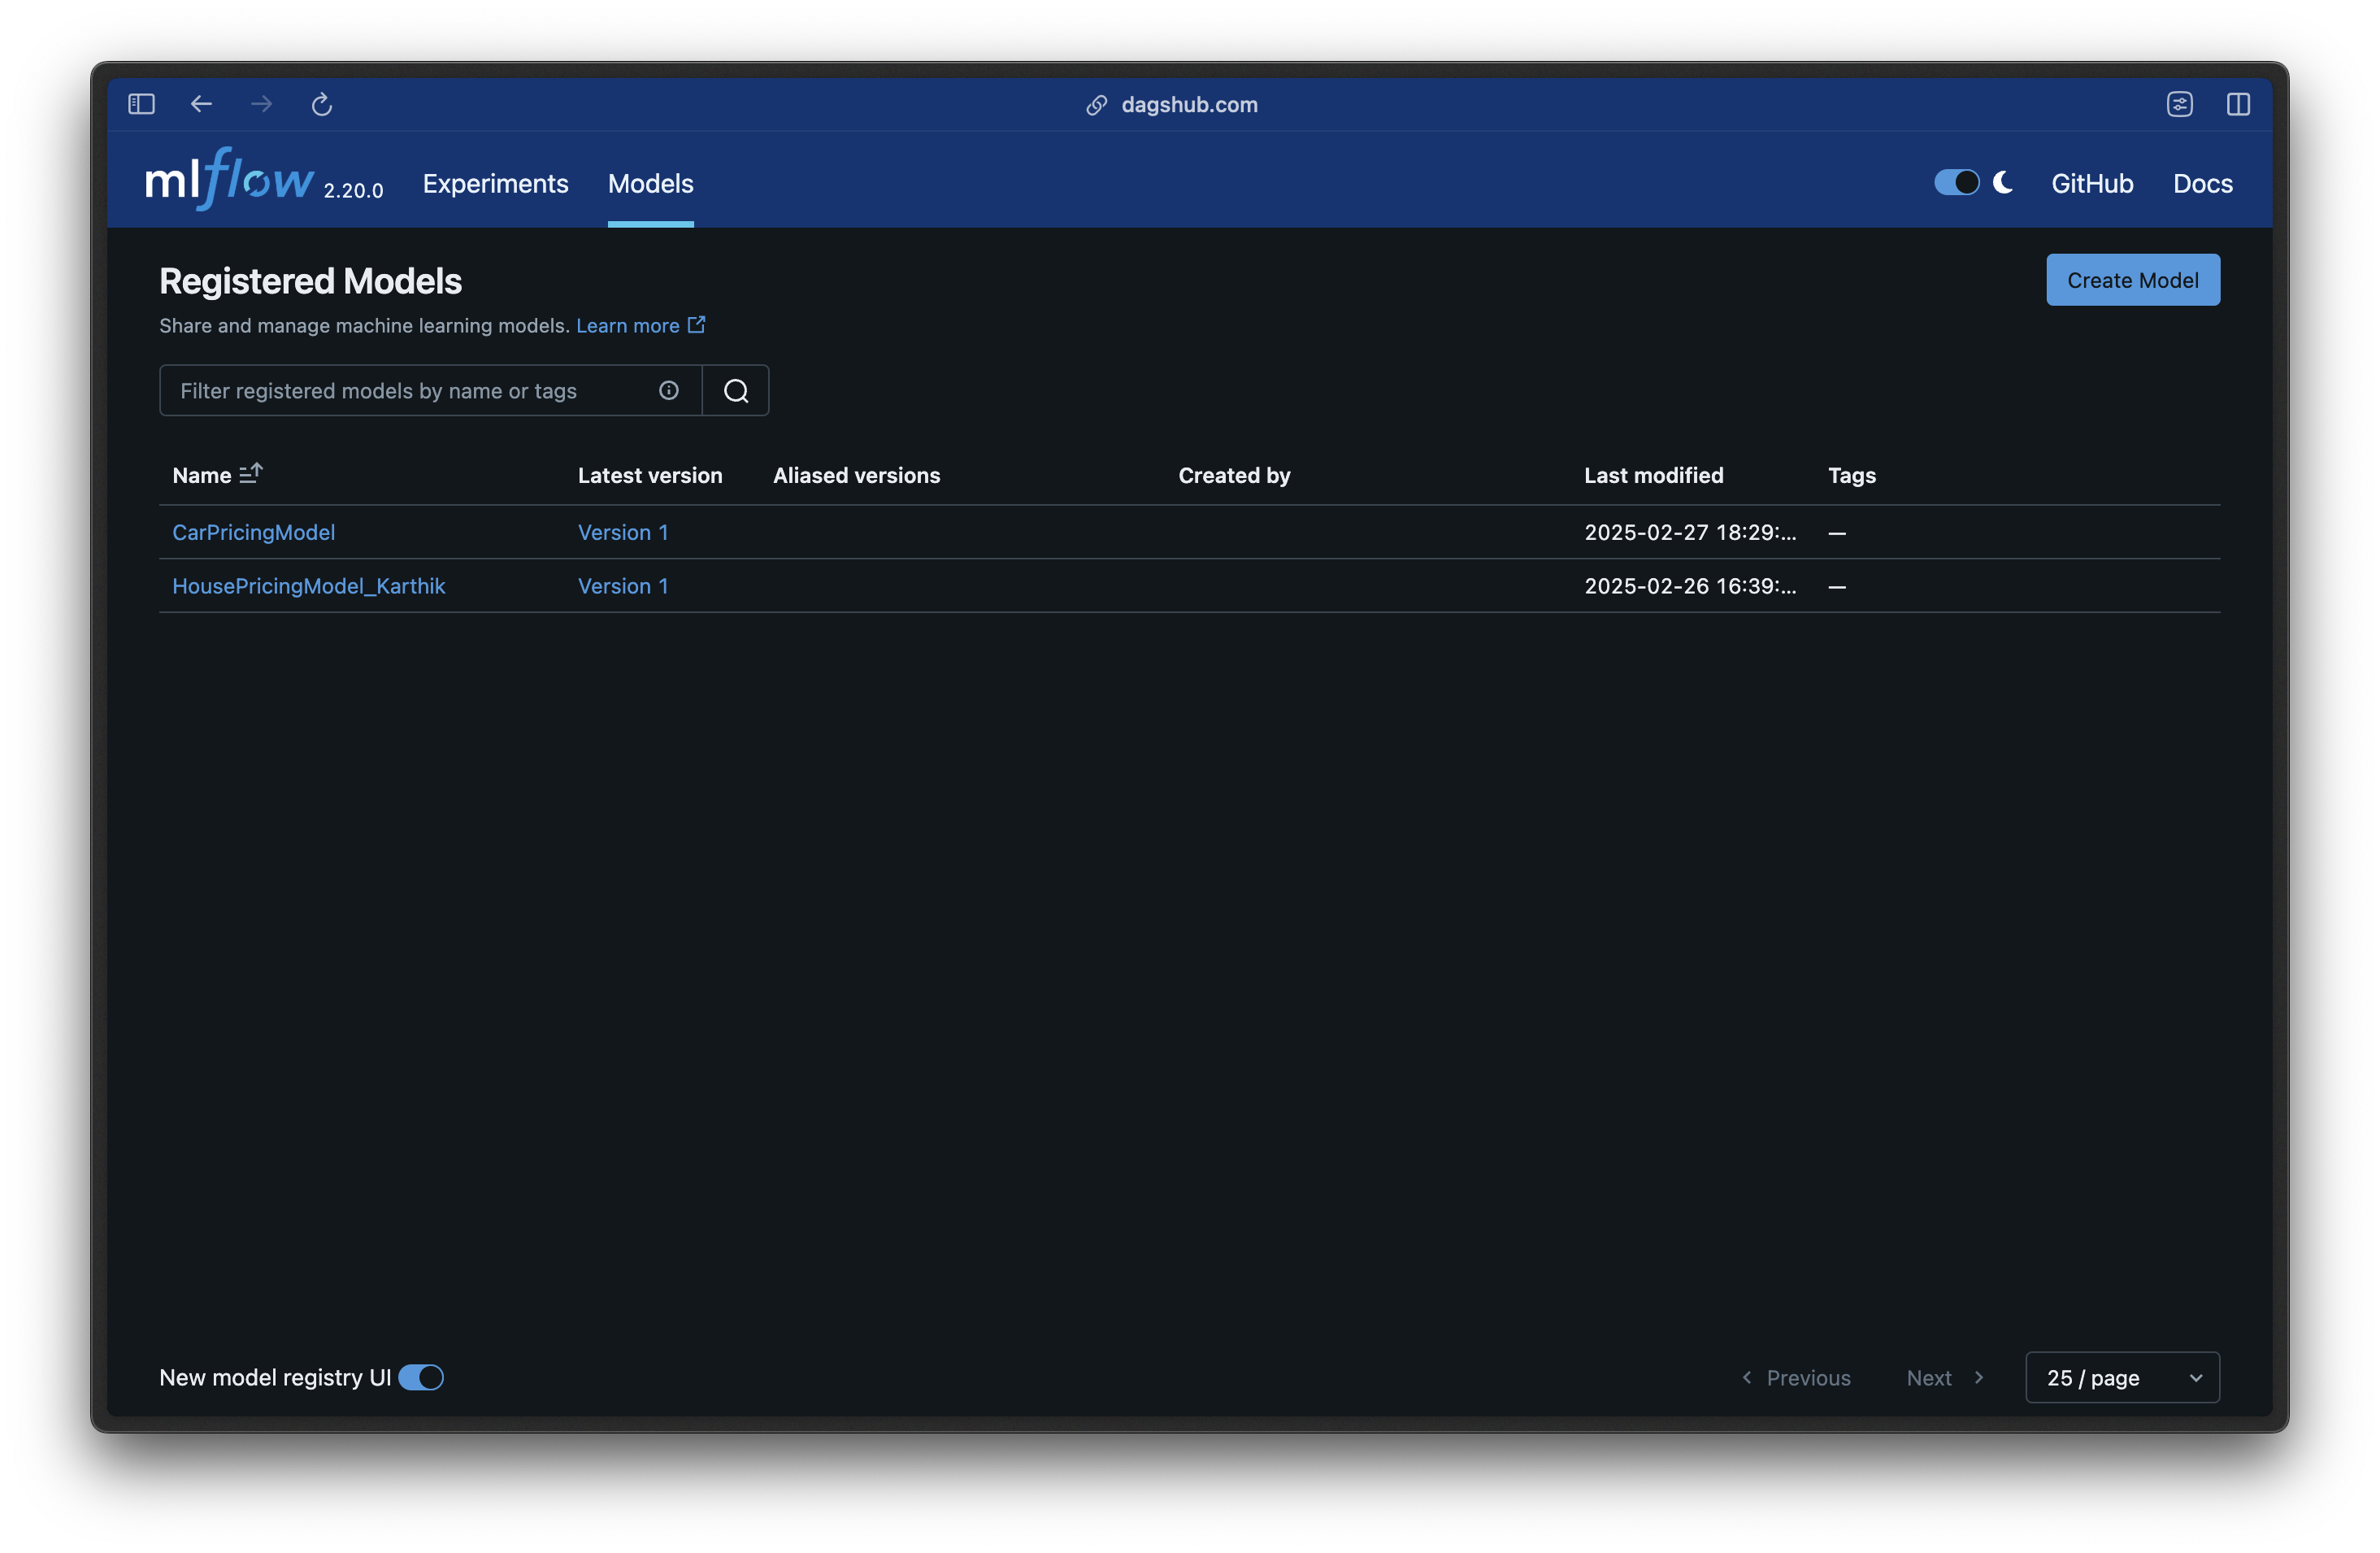
</div>